# DataSHIELD Python Demo

1. Establish connections with DataSHIELD nodes

In [262]:
from datashield import DSSession, DSLoginBuilder, DSError
import pandas as pd

url = 'https://opal-demo.obiba.org'
builder = DSLoginBuilder().add('server1', url, 'dsuser', 'P@ssw0rd').add('server2', url, 'dsuser', 'P@ssw0rd')
logins = builder.build()

session = DSSession(logins)
session.open()

2. Utility functions

In [263]:
session.profiles()

{'server1': {'available': ['default',
   'exposome',
   'geo',
   'mediation',
   'mtl',
   'omics',
   'survival'],
  'current': 'default'},
 'server2': {'available': ['default',
   'exposome',
   'geo',
   'mediation',
   'mtl',
   'omics',
   'survival'],
  'current': 'default'}}

In [264]:
pkgs = session.packages()
pd.DataFrame.from_records(pkgs['server1'])

,pkg,version
0,dsBase,6.3.0
1,resourcer,1.4.0


In [265]:
methods = session.methods(type='aggregate')
pd.DataFrame.from_records(methods['server1'])

,name,class,value,pkg,version
0,NROW,func,base::NROW,dsBase,6.3.0
1,asFactorDS1,func,dsBase::asFactorDS1,dsBase,6.3.0
2,asListDS,func,dsBase::asListDS,dsBase,6.3.0
3,aucDS,func,dsBase::aucDS,dsBase,6.3.0
4,boxPlotGGDS,func,dsBase::boxPlotGGDS,dsBase,6.3.0
...,...,...,...,...,...
66,tableDS,func,dsBase::tableDS,dsBase,6.3.0
67,tableDS2,func,dsBase::tableDS2,dsBase,6.3.0
68,tapplyDS,func,dsBase::tapplyDS,dsBase,6.3.0
69,testObjExistsDS,func,dsBase::testObjExistsDS,dsBase,6.3.0


In [266]:
session.tables()

{'server1': ['CNSIM.CNSIM1',
  'CNSIM.CNSIM2',
  'CNSIM.CNSIM3',
  'DASIM.DASIM1',
  'DASIM.DASIM2',
  'DASIM.DASIM3',
  'DISCORDANT.DISCORDANT_STUDY1',
  'DISCORDANT.DISCORDANT_STUDY2',
  'DISCORDANT.DISCORDANT_STUDY3',
  'GREENSPACE.Cohort1_exposome',
  'GREENSPACE.Cohort2_exposome',
  'GREENSPACE.Cohort3_exposome',
  'MEDIATION.UPBdata1',
  'MEDIATION.UPBdata2',
  'MEDIATION.UPBdata3',
  'SURVIVAL.EXPAND_WITH_MISSING1',
  'SURVIVAL.EXPAND_WITH_MISSING2',
  'SURVIVAL.EXPAND_WITH_MISSING3',
  'TESTING.TESTING1',
  'TESTING.TESTING2',
  'TESTING.TESTING3',
  'TITANIC_NEWCOMERS_WORKSHOP.titanic_server_1',
  'TITANIC_NEWCOMERS_WORKSHOP.titanic_server_2',
  'serverDataKey.myKey'],
 'server2': ['CNSIM.CNSIM1',
  'CNSIM.CNSIM2',
  'CNSIM.CNSIM3',
  'DASIM.DASIM1',
  'DASIM.DASIM2',
  'DASIM.DASIM3',
  'DISCORDANT.DISCORDANT_STUDY1',
  'DISCORDANT.DISCORDANT_STUDY2',
  'DISCORDANT.DISCORDANT_STUDY3',
  'GREENSPACE.Cohort1_exposome',
  'GREENSPACE.Cohort2_exposome',
  'GREENSPACE.Cohort3_expo

In [267]:
session.resources()

{'server1': ['OMICS.GSE66351_1',
  'OMICS.GSE66351_2',
  'OMICS.genexpr_BIB',
  'OMICS.genexpr_EDE',
  'OMICS.genexpr_KAN',
  'OMICS.genexpr_MOB',
  'OMICS.genexpr_RHE',
  'OMICS.genexpr_SAB',
  'OMICS.methy_BIB',
  'OMICS.methy_EDE',
  'OMICS.methy_KAN',
  'OMICS.methy_MOB',
  'OMICS.methy_RHE',
  'OMICS.methy_SAB',
  'OMICS.tcga_liver',
  'CADSET-coh1.cadset_1',
  'CADSET-coh2.cadset_2',
  'workshop.GSE40732',
  'workshop.GSE40732_1',
  'workshop.GSE40732_2',
  'dsMTL_Server1.dsLasso_C_X',
  'dsMTL_Server1.dsLasso_C_Y',
  'dsMTL_Server1.dsLasso_R_X',
  'dsMTL_Server1.dsLasso_R_Y',
  'dsMTL_Server1.dsMTL_L21_C_X',
  'dsMTL_Server1.dsMTL_L21_C_Y',
  'dsMTL_Server1.dsMTL_L21_R_X',
  'dsMTL_Server1.dsMTL_L21_R_Y',
  'dsMTL_Server1.dsMTL_Net_C_X',
  'dsMTL_Server1.dsMTL_Net_C_Y',
  'dsMTL_Server1.dsMTL_Net_R_X',
  'dsMTL_Server1.dsMTL_Net_R_Y',
  'dsMTL_Server1.dsMTL_Trace_C_X',
  'dsMTL_Server1.dsMTL_Trace_C_Y',
  'dsMTL_Server1.dsMTL_Trace_R_X',
  'dsMTL_Server1.dsMTL_Trace_R_Y',
  'dsM

3. Make analysis

In [268]:
session.assign_resource('client', resources = { 'server1': 'RSRC.CNSIM1', 'server2': 'RSRC.CNSIM2' })
session.ls()

{'server1': ['client'], 'server2': ['client']}

In [269]:
session.aggregate('classDS("client")')

{'server1': ['SQLResourceClient', 'ResourceClient', 'R6'],
 'server2': ['TidyFileResourceClient',
  'FileResourceClient',
  'ResourceClient',
  'R6']}

In [270]:
session.assign_expr('df', 'as.resource.data.frame(client, strict = TRUE)')
session.ls()

{'server1': ['client', 'df'], 'server2': ['client', 'df']}

In [271]:
session.aggregate('classDS("df")')

{'server1': 'data.frame', 'server2': 'data.frame'}

In [272]:
session.aggregate('colnamesDS("df")')

{'server1': ['id',
  'LAB_TSC',
  'LAB_TRIG',
  'LAB_HDL',
  'LAB_GLUC_ADJUSTED',
  'PM_BMI_CONTINUOUS',
  'DIS_CVA',
  'MEDI_LPD',
  'DIS_DIAB',
  'DIS_AMI',
  'GENDER',
  'PM_BMI_CATEGORICAL'],
 'server2': ['entity_id',
  'DIS_AMI',
  'DIS_CVA',
  'DIS_DIAB',
  'GENDER',
  'LAB_GLUC_ADJUSTED',
  'LAB_HDL',
  'LAB_TRIG',
  'LAB_TSC',
  'MEDI_LPD',
  'PM_BMI_CATEGORICAL',
  'PM_BMI_CONTINUOUS']}

In [273]:
session.aggregate('meanDS(df$LAB_GLUC_ADJUSTED)')

{'server1': {'EstimatedMean': 6.12409001097695,
  'Nmissing': 341,
  'Nvalid': 1822,
  'Ntotal': 2163,
  'ValidityMessage': 'VALID ANALYSIS'},
 'server2': {'EstimatedMean': 6.10151761517615,
  'Nmissing': 505,
  'Nvalid': 2583,
  'Ntotal': 3088,
  'ValidityMessage': 'VALID ANALYSIS'}}

In [274]:
session.assign_table('df2', tables = { 'server1': 'CNSIM.CNSIM1', 'server2': 'CNSIM.CNSIM2' })
session.ls()

{'server1': ['client', 'df', 'df2'], 'server2': ['client', 'df', 'df2']}

In [275]:
numints = 20
densityGrid = session.aggregate(f'densityGridDS(df2$LAB_TSC, df2$LAB_HDL, limits=FALSE, x.min=NULL, x.max=NULL, y.min=NULL, y.max=NULL, numints = {numints})')
densityGrid['server1']

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2.59225,
  0.068282325],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2.95275,
  0.208472975],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3.31325,
  0.348663625],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  8,
  0,
  4,
  0,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  3.67375,
  0.488854275],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  8,
  3,
  8,
  7,
  6,
  11,
  0,
  6,
  0,
  0,
  0,
  0,
  4.03425,
  0.629044925],
 [0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  4,
  13,
  16,
  6,
  12,
  12,
  9,
  6,
  4,
  0,
  0,
  0,
  4.39475,
  0.769235575],
 [0,
  0,
  0,
  0,
  0,
  0,
  3,
  7,
  11,
  14,
  16,
  28,
  25,
  16,
  9,
  9,
  10,
  0,
  0,
  0,
  4.75525,
  0.909426225],
 [0,
  0,
  0,
  0,
  0,
  0,
  4,
  7,
  19,
  21,
  28,
  31,
  26,
  27,
  13,
  10,
  0,
  3,
 

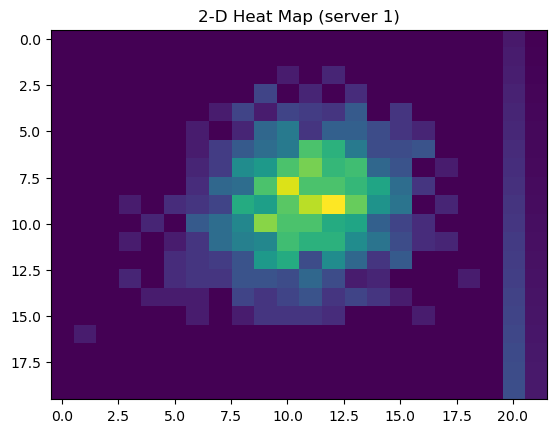

In [276]:
import matplotlib.pyplot as plt
plt.imshow(densityGrid['server1'], aspect='auto')
plt.title( "2-D Heat Map (server 1)" )
plt.show()

In [277]:
data = session.aggregate('histogramDS2(df2$LAB_GLUC_ADJUSTED, num.breaks=20, min=0, max=20, method.indicator=1, k=3, noise=0.25)')
data['server1']

{'type': 'list',
 'attributes': {'names': {'type': 'character',
   'attributes': {},
   'value': ['histobject', 'invalidcells']}},
 'value': [{'type': 'list',
   'attributes': {'names': {'type': 'character',
     'attributes': {},
     'value': ['breaks', 'counts', 'density', 'mids', 'xname', 'equidist']},
    'class': {'type': 'character', 'attributes': {}, 'value': ['histogram']}},
   'value': [{'type': 'double',
     'attributes': {},
     'value': [0,
      1,
      2,
      3,
      4,
      5,
      6,
      7,
      8,
      9,
      10,
      11,
      12,
      13,
      14,
      15,
      16,
      17,
      18,
      19,
      20]},
    {'type': 'double',
     'attributes': {},
     'value': [0,
      0,
      9,
      60,
      277,
      521,
      558,
      281,
      80,
      9,
      4,
      11,
      5,
      5,
      0,
      0,
      0,
      0,
      0,
      0]},
    {'type': 'double',
     'attributes': {},
     'value': [0,
      0,
      0.00493963,
      0.

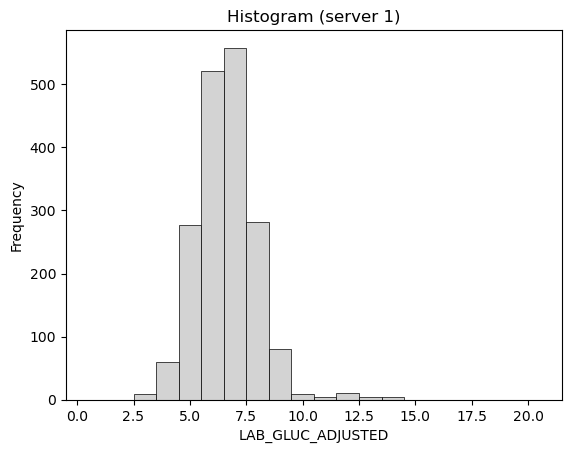

In [278]:
breaks = data['server1']['value'][0]['value'][0]['value']
counts = data['server1']['value'][0]['value'][1]['value']

plt.bar(breaks[1:], counts, width=1, edgecolor='black', linewidth=0.5, color='lightgrey')
plt.xlabel('LAB_GLUC_ADJUSTED')
plt.ylabel('Frequency')
plt.title('Histogram (server 1)')
plt.show()

In [279]:
try:
  session.aggregate('heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx")')
except DSError as e:
  print(session.get_errors())

{'server1': OpalDSError('Command d6324978-1960-43cc-ac6e-4ba49bdc8827-10 failed on server1: Error while evaluating \'dsBase::heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx")\' -> Error in dsBase::heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx") : \n  object \'x.new\' not found\n'), 'server2': OpalDSError('Command 76b78467-ae98-4225-bfbb-3aaa0da95745-10 failed on server2: Error while evaluating \'dsBase::heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx")\' -> Error in dsBase::heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx") : \n  object \'x.new\' not found\n')}


In [280]:
session.close()